In [413]:
import requests
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [414]:
pl_players = pd.read_csv("../data/processed/fbref/ENG-Premier League/2024-2025/player_match/summary.csv")
player_seasons = pd.read_csv("../data/processed/fbref/ENG-Premier League/2024-2025/player_season/defense.csv")

match_df = pd.DataFrame(pl_players)
season_df = pd.DataFrame(player_seasons)


blocks = player_seasons["blocks"]
tkl_plus_int = player_seasons["tkl_int"]
clearances = player_seasons["clr"]

defenders = player_seasons[player_seasons["position"] == "DEF"]
goalkeeper = player_seasons[player_seasons["position"] == "GK"]
midfielders = player_seasons[player_seasons["position"] == "MID"]
forwards = player_seasons[player_seasons["position"] == "FWD"]



In [415]:
#number of empty rows per column
empty_rows = pl_players.isnull().sum()
row_types = pl_players.dtypes


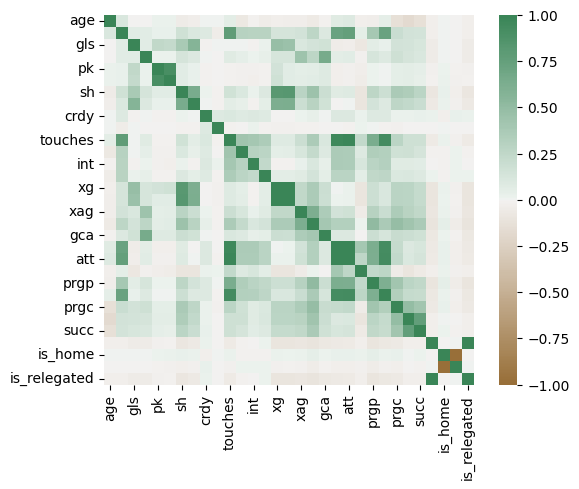

In [416]:
df = match_df.copy()
df = df.drop(columns=["season", "jersey_number"])
def_matrix = df.corr(numeric_only=True, method='spearman')  # pandas ≥1.5

axis_corr = sns.heatmap(
def_matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [417]:

#Defensive contributions points by position
# Defensive contributions points by position for each player per match
if "player" in defenders.columns:
    defenders = defenders.groupby("player").agg({
        "blocks": "sum",
        "tkl_int": "sum",
        "clr": "sum",
        "team": "first"
    }).reset_index()
    defenders["defensive_contributions"] = defenders["blocks"] + defenders["tkl_int"] + defenders["clr"]
    defenders["defensive_contributions_points"] = (defenders["defensive_contributions"] // 10) * 2  # Assuming 2 points per 10 defensive contributions

display(defenders.sort_values(by="defensive_contributions_points", ascending=False).head(10))

,player,blocks,tkl_int,clr,team,defensive_contributions,defensive_contributions_points
137,Murillo,69,89,249,NFO,407,80
71,James Tarkowski,57,105,213,EVE,375,74
131,Maxence Lacroix,48,122,207,CRY,377,74
141,Nathan Collins,77,74,226,BRE,377,74
38,Dara O'Shea,62,82,225,IPS,369,72
130,Max Kilman,58,77,212,WHU,347,68
9,Antonee Robinson,43,157,133,FUL,333,66
147,Nikola Milenković,41,78,209,NFO,328,64
39,Dean Huijsen,40,87,198,BOU,325,64
72,Jan Bednarek,47,92,190,SOU,329,64


In [418]:
# Defensive contributions points by position for each player per match
if "player" in midfielders.columns:
    midfielders = midfielders.groupby("player").agg({
        "blocks": "sum",
        "tkl_int": "sum",
        "clr": "sum"
    }).reset_index()
    midfielders["defensive_contributions"] = midfielders["blocks"] + midfielders["tkl_int"] + midfielders["clr"]
    midfielders["defensive_contributions_points"] = (midfielders["defensive_contributions"] // 10) * 2  # Assuming 2 points per 10 defensive contributions

display(midfielders.sort_values(by="defensive_contributions_points", ascending=False).head(10))

,player,blocks,tkl_int,clr,defensive_contributions,defensive_contributions_points
121,Moisés Caicedo,49,163,60,272,54
63,Idrissa Gana Gueye,48,181,36,265,52
31,Christian Nørgaard,52,128,70,250,50
46,Elliot Anderson,48,123,76,247,48
159,Wilfred Ndidi,47,116,80,243,48
96,Lewis Cook,30,122,70,222,44
140,Ryan Gravenberch,35,129,59,223,44
23,Carlos Baleba,47,125,44,216,42
87,João Gomes,42,141,33,216,42
150,Thomas Partey,29,124,49,202,40


In [419]:
# Defensive contributions points by position for each player per match
if "player" in forwards.columns:
    forwards = forwards.groupby("player").agg({
        "blocks": "sum",
        "tkl_int": "sum",
        "clr": "sum",
        "team": "first"
    }).reset_index()
    forwards["defensive_contributions"] = forwards["blocks"] + forwards["tkl_int"] + forwards["clr"]
    forwards["defensive_contributions_points"] = (forwards["defensive_contributions"] // 10) * 2  # Assuming 2 points per 10 defensive contributions

display(forwards.sort_values(by="defensive_contributions_points", ascending=False).head(10))

,player,blocks,tkl_int,clr,team,defensive_contributions,defensive_contributions_points
9,Antoine Semenyo,67,66,39,BOU,172,34
15,Bryan Mbeumo,26,63,55,BRE,144,28
29,Dango Ouattara,36,46,51,BOU,133,26
56,Iliman Ndiaye,30,73,24,EVE,127,24
47,Facundo Buonanotte,34,65,14,LEI,113,22
142,Yankuba Minteh,22,59,31,BHA,112,22
4,Alex Iwobi,26,58,29,FUL,113,22
80,Kaoru Mitoma,48,59,10,BHA,117,22
66,Jarrod Bowen,22,57,25,WHU,104,20
60,Jacob Murphy,31,41,35,NEW,107,20


In [420]:
import secrets
new_id = secrets.token_hex(4)  # e.g. "5ff4ab71"


print(new_id)

7aff319c


In [421]:
salah_df = pl_players[pl_players["player"] == "Mohamed Salah"]

positions = salah_df["pos"].unique()
values = salah_df["pos"].value_counts()
print("Positions for Mohamed Salah:" + str(positions))
print("Value counts for positions of Mohamed Salah:" + str(values))

Positions for Mohamed Salah:['RW' 'RW,FW' 'RW,AM' 'AM' 'RW,WB' 'RW,RM']
Value counts for positions of Mohamed Salah:pos
RW       33
RW,FW     1
RW,AM     1
AM        1
RW,WB     1
RW,RM     1
Name: count, dtype: int64


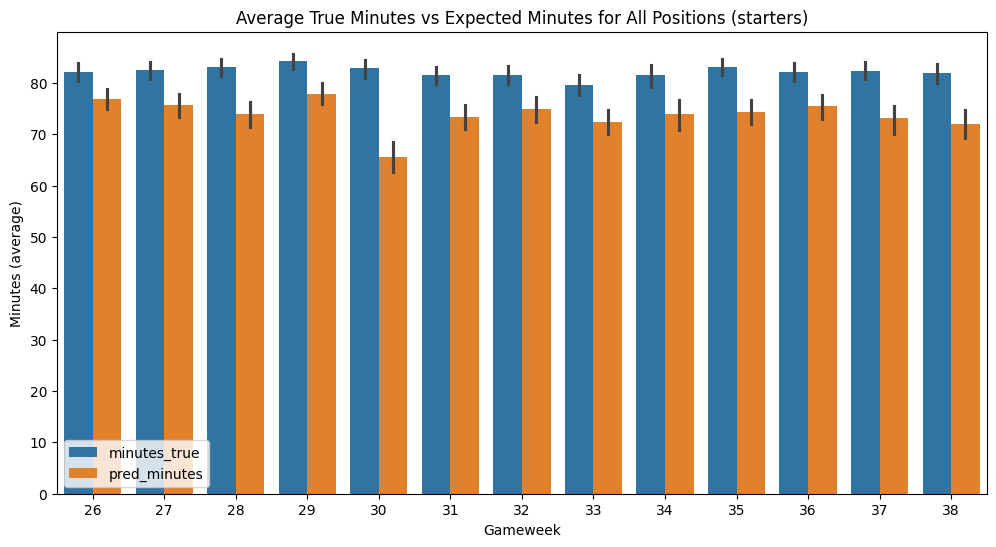

In [422]:

exp_mins = pd.read_csv("../data/models/minutes/versions/v1/expected_minutes.csv")

player = []  # Example players to filter by, or set to None to plot all players
position = []  # Example positions to filter by, or set to None to plot all positions
starter = [1]  # Example starter status to filter by, or set to None to plot all statuses

expected_minutes_df = pd.DataFrame(exp_mins)


# Compute average predicted and true minutes per player each game week as DataFrames
pred_df = expected_minutes_df.groupby(["player", "gw_orig", "is_starter", "pos"], as_index=False)["pred_minutes"].mean()
true_df = expected_minutes_df.groupby(["player", "gw_orig"], as_index=False)["minutes_true"].mean()

# Merge into a single DataFrame so seaborn receives a DataFrame (not a Series)
# Merge on both player and gw_orig so the gw_orig column remains available for plotting
merged = pd.merge(true_df, pred_df, on=["player", "gw_orig"], how="outer")

# Optional: filter to the players you care about
if player:
	merged = merged[merged["player"].isin(player)]
if position:
	merged = merged[merged["pos"].isin(position)]
if starter:
	merged = merged[merged["is_starter"].isin(starter)]

if merged.empty:
	print("No players found to plot for:", player)
else:
	# Melt to long form for easy seaborn plotting
	melted = merged.melt(id_vars=["player", "gw_orig"], value_vars=["minutes_true", "pred_minutes"],
						 var_name="type", value_name="minutes")

	plt.figure(figsize=(12, 6))
	# plot by gameweek (gw_orig) on the x axis
	sns.barplot(data=melted, x="gw_orig", y="minutes", hue="type")

	# build a clean title string depending on filters
	pos_str = ", ".join(position) if position else "All Positions"
	if starter == [1]:
		starter_str = "starters"
	elif starter == [0]:
		starter_str = "non-starters"
	else:
		starter_str = "all players"

	plt.title(f"Average True Minutes vs Expected Minutes for {pos_str} ({starter_str})")
	plt.xlabel('Gameweek')
	plt.ylabel('Minutes (average)')
	plt.legend(title="")
	plt.show()



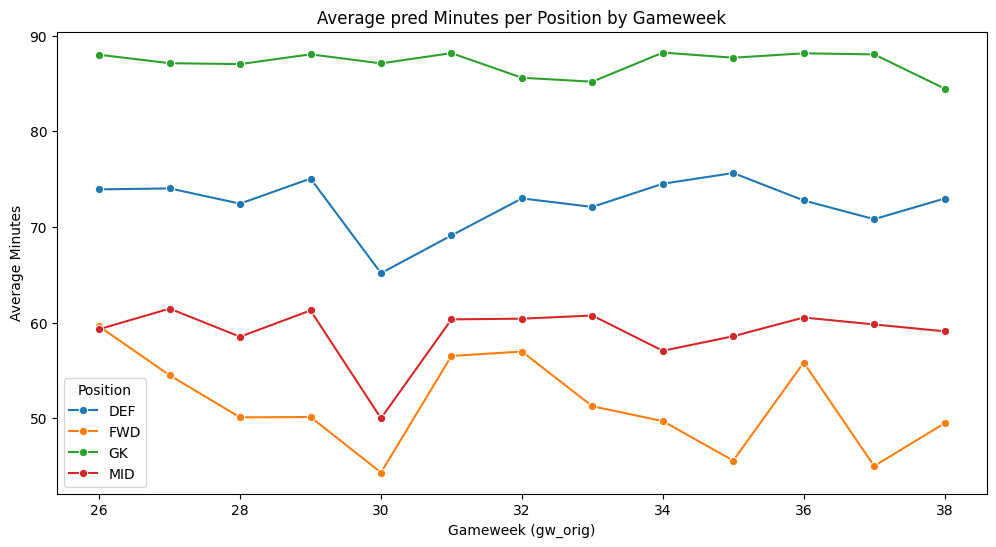

In [423]:
player_minutes = pd.read_csv("../data/models/minutes/versions/v1/expected_minutes.csv", usecols=["player", "gw_orig", "pred_minutes", "minutes_true","is_starter", "pos"])
player_minutes_df = pd.DataFrame(player_minutes)

# average minutes per position per gameweek
min_per_pos = player_minutes_df.groupby(["pos", "gw_orig"], as_index=False)["pred_minutes"].mean()

plt.figure(figsize=(12, 6))
# plot average minutes by gameweek for each position (use a lineplot so gw_orig is on x-axis)
sns.lineplot(data=min_per_pos, x="gw_orig", y="pred_minutes", hue="pos", marker="o")
plt.title('Average pred Minutes per Position by Gameweek')
plt.xlabel('Gameweek (gw_orig)')
plt.ylabel('Average Minutes')
plt.legend(title="Position")
plt.show()

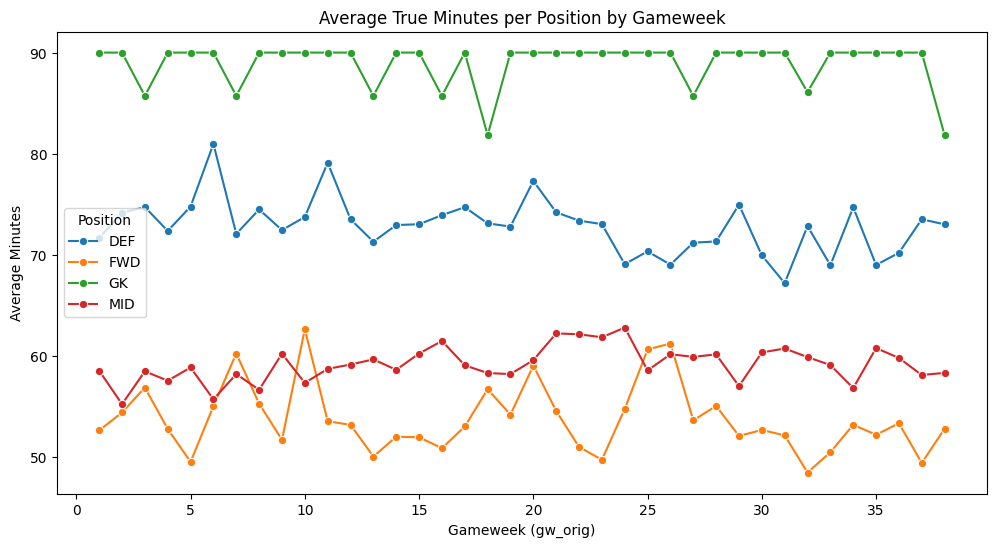

In [424]:
player_minutes = pd.read_csv("../data/processed/registry/fixtures/2024-2025/player_minutes_calendar.csv", usecols=["player", "gw_orig", "minutes", "is_starter", "pos"])
player_minutes_df = pd.DataFrame(player_minutes)

# average minutes per position per gameweek
min_per_pos = player_minutes_df.groupby(["pos", "gw_orig"], as_index=False)["minutes"].mean()

plt.figure(figsize=(12, 6))
# plot average minutes by gameweek for each position (use a lineplot so gw_orig is on x-axis)
sns.lineplot(data=min_per_pos, x="gw_orig", y="minutes", hue="pos", marker="o")
plt.title('Average True Minutes per Position by Gameweek')
plt.xlabel('Gameweek (gw_orig)')
plt.ylabel('Average Minutes')
plt.legend(title="Position")
plt.show()

Threshold = 60 minutes — Accuracy: 0.702

Classification report:

              precision    recall  f1-score   support

     <60 min       0.17      0.59      0.26        22
    >=60 min       0.95      0.71      0.81       223

    accuracy                           0.70       245
   macro avg       0.56      0.65      0.54       245
weighted avg       0.88      0.70      0.76       245



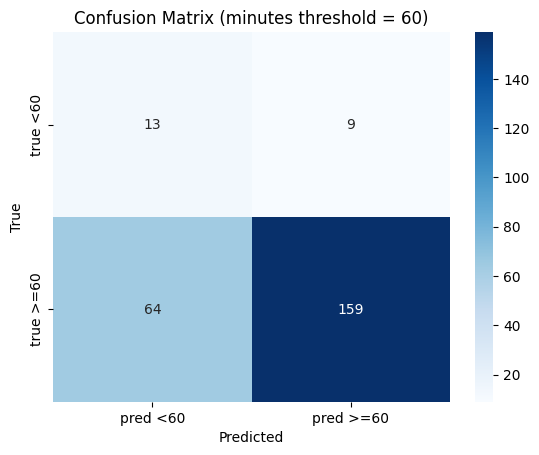

In [425]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



# Ensure merged exists (created in prior cell)
if 'merged' not in globals():
    print("merged DataFrame not found. Run the cell that creates `merged` first.")
else:
    merged_cm = merged[['minutes_true', 'pred_minutes', "pos"]].dropna()
    if df_cm.empty:
        print("No rows to compute confusion matrix (all NA or empty).")
    else:
        # Choose a simple threshold to turn minutes into classes (can change TH)
        TH = 60  # minutes threshold: >= TH => played majority
        y_true = (df_cm['minutes_true'] >= TH).astype(int)
        y_pred = (df_cm['pred_minutes'] >= TH).astype(int)

        cm = confusion_matrix(y_true, y_pred)
        acc = accuracy_score(y_true, y_pred)

        print(f"Threshold = {TH} minutes — Accuracy: {acc:.3f}\n")
        print("Classification report:\n")
        print(classification_report(y_true, y_pred, target_names=[f"<{TH} min", f">={TH} min"]))

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[f"pred <{TH}", f"pred >={TH}"],
                    yticklabels=[f"true <{TH}", f"true >={TH}"])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix (minutes threshold = {TH})')
        plt.show()

In [ ]:
exp_df = pd.read_csv("../data/models/expected_points/v1/expected_points.csv", usecols=["player_id","player","gw_orig", "date_played", "exp_goals","exp_assists", "xp_goals", "xp_assists", "exp_points_total"])
pts_df = pd.read_csv("../data/processed/fpl/2024-2025/gws/merged_gws.csv", usecols=["player_id", "xP", "total_points", "expected_goals", "round", "game_date"])
pts_df = pts_df.rename(columns={"round": "gw_orig"})
exp_df =exp_df.merge(
    pts_df,
    on=["player_id", "gw_orig"],
    how="left")

exp_players = ["Rasmus Højlund"]
Exp_players_df = exp_df.loc[exp_df["player"].isin(exp_players)].copy()

display(Exp_players_df)